## Objective:
To identify the most influential factors affecting the overall score of Scotch whiskies, considering sensory attributes (like color, nose, palate, finish) and non-sensory variables (such as age and geographical location).

## Part 1. Data exploration
#### Feature Grouping:
#### Sensory Variables:

Color: Represents the color shades of the whisky.

Nose (Smell): Describes aroma-related properties, including richness, sweetness, and peatiness.

Palate (Taste): Represents taste attributes, such as smoothness, dryness, or smokiness.

Finish (Aftertaste): Defines the lingering effects after tasting (e.g., dry, sweet, long finish).

#### Non-sensory variables:

These include variables like:

Age: The age of the whisky in years.

Alcohol percentage (%).

District and Region: Categorical variables representing geographical origin.

In [1]:
import pandas as pd

# Load the Excel file using a relative path
file_path = "scotch.xlsx"  # Relative to the current working directory
scotch_df = pd.read_excel(file_path)

# Header
scotch_df = pd.read_excel(file_path, sheet_name='scotch.xls')
print(scotch_df.head())


  Unnamed: 0 Unnamed: 1 color color.1 color.2 color.3 color.4 color.5 color.6  \
0       NAME        NaN  wyne  yellow  v.pale    pale  p.gold    gold  o.gold   
1  Aberfeldy  Aberfeldy     0       1       0       0       0       0       0   
2   Aberlour   Aberlour     0       0       0       0       0       0       0   
3    Ardberg    Ardberg     0       0       0       0       0       0       0   
4    Ardmore    Ardmore     0       0       0       0       1       0       0   

  color.7  ... Unnamed: 75 Unnamed: 76 Unnamed: 77 Unnamed: 78 Unnamed: 79  \
0  f.gold  ...    DISTRICT       islay     midland        spey        east   
1       0  ...     MIDLAND           0           1           0           0   
2       0  ...        SPEY           0           0           1           0   
3       0  ...       SOUTH           1           0           0           0   
4       0  ...        SPEY           0           0           1           0   

  Unnamed: 80 Unnamed: 81 Unnamed: 82 Unname

C:\Users\gagar\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\gagar\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\gagar\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\gagar\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## Part 2: Data preparation
I performed data preparation steps to make the dataset easier to read and analyze:

1. The first and second rows were merged to create a proper header
2. The value -9 in the age column was replaced with 9, assuming it to be a data entry error
3. The last row, containing variable counts, was removed as it is not needed for analysis
4. Standardized and renamed variable names to maintain a consistent, readable format

In [2]:
# Step 1: Merge the first row into the column headers
# If the header in the first row is empty or unnamed, use the value from the second row as the column name
scotch_df.columns = [
    f"{col}.{scotch_df.iloc[0][col]}" if not pd.isna(scotch_df.iloc[0][col]) and "Unnamed" not in col 
    else f"{scotch_df.iloc[0][col]}"  # Use second-row value if the column is unnamed
    for col in scotch_df.columns
]

# Step 2: Drop the first row (now merged into column headers)
scotch_df = scotch_df.drop(index=0).reset_index(drop=True)

# Step 3: Remove the second column
scotch_df = scotch_df.drop(scotch_df.columns[1], axis=1)

# Step 4: Add the 'area.' prefix to the last 9 columns
last_9_columns = scotch_df.columns[-9:]  # Select the last 9 columns
scotch_df.rename(columns={col: f"area.{col}" for col in last_9_columns}, inplace=True)

# Step 5: Replace -9 with 9 in the 'AGE' column if it exists
if 'AGE' in scotch_df.columns:
    scotch_df['AGE'] = scotch_df['AGE'].replace(-9, 9)

# Step 6: Filter rows to include only those where 'NAME' column is present
scotch_df = scotch_df[scotch_df['NAME'].notna()]

# Step 7: Rename columns using the mapping for consistency
prefix_mapping = {
    'NAME' : 'Whiskey',
    'BODY' : 'Body',
    'color.': 'Color.',
    'NOSE.': 'Smell.',
    'PAL.': 'Taste.',
    'FIN.': 'Aftertaste.',
    'area.': 'Area.',
    '%': 'Alcohol_Percentage',
    'AGE': 'Age',
    'REGION' : 'Region',
    'DIST':'Distillery score',
    'DISTRICT': 'District',
    'SCORE': 'Score'
}

new_columns = []
for col in scotch_df.columns:
    renamed = col
    for old_prefix, new_prefix in prefix_mapping.items():
        if col.startswith(old_prefix):
            renamed = col.replace(old_prefix, new_prefix, 1)
    new_columns.append(renamed)

scotch_df.columns = new_columns

# Step 8: Save the final modified DataFrame to an Excel file
output_file_path = "Statistical_scotch.xlsx"
scotch_df.to_excel(output_file_path, index=False)

# Display the first 5 rows of the updated DataFrame
scotch_df.head()

C:\Users\gagar\AppData\Local\Temp\ipykernel_4380\2569208517.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scotch_df['AGE'] = scotch_df['AGE'].replace(-9, 9)


,Whiskey,Color.wyne,Color.1.yellow,Color.2.v.pale,Color.3.pale,Color.4.p.gold,Color.5.gold,Color.6.o.gold,Color.7.f.gold,Color.8.bronze,...,District,Area.islay,Area.midland,Area.spey,Area.east,Area.west,Area.north,Area.lowland,Area.campbell,Area.islands
0,Aberfeldy,0,1,0,0,0,0,0,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
1,Aberlour,0,0,0,0,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
2,Ardberg,0,0,0,0,0,0,0,0,0,...,SOUTH,1,0,0,0,0,0,0,0,0
3,Ardmore,0,0,0,0,1,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
4,Auchentoshan,0,0,0,0,1,0,0,0,0,...,WEST,0,0,0,0,0,0,1,0,0


## Part 3: Statistical analysis

I will explore key variables that affect score of whiskey to see what variables attribute the most

### 3.1 Sensory variables influence
In this part I will explore influence of all sensory variables to undesrtand what can attributes best whiskey qualities

##### By using a Random Forest regressor I assessed sensory variables contribution to the whisky score. It displays the top 10 most influential features within each group, helping to identify which sensory attributes affect the overall score the most.

In [3]:
#I will create another df for statistical analysis
df=scotch_df
df.head()

,Whiskey,Color.wyne,Color.1.yellow,Color.2.v.pale,Color.3.pale,Color.4.p.gold,Color.5.gold,Color.6.o.gold,Color.7.f.gold,Color.8.bronze,...,District,Area.islay,Area.midland,Area.spey,Area.east,Area.west,Area.north,Area.lowland,Area.campbell,Area.islands
0,Aberfeldy,0,1,0,0,0,0,0,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
1,Aberlour,0,0,0,0,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
2,Ardberg,0,0,0,0,0,0,0,0,0,...,SOUTH,1,0,0,0,0,0,0,0,0
3,Ardmore,0,0,0,0,1,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
4,Auchentoshan,0,0,0,0,1,0,0,0,0,...,WEST,0,0,0,0,0,0,1,0,0


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Function to compute feature importances for a given group of variables
def feature_importance_by_group(group_prefix, target='Score'):
    # Filter columns based on group prefix (e.g., 'color.', 'smell.', etc.)
    group_columns = [col for col in df.columns if col.startswith(group_prefix)]
    
    # Prepare X (features) and y (target)
    X = df[group_columns]
    y = df[target]
    
    # Train Random Forest to assess feature importance
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    
    # Get and sort feature importances
    importances = model.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]  # Sort descending
    
    # Return sorted feature names with their importance scores
    return [(group_columns[i], importances[i]) for i in sorted_indices]

# Evaluate feature importance for different variable groups
color_importance = feature_importance_by_group('Color.')
smell_importance = feature_importance_by_group('Smell.')
taste_importance = feature_importance_by_group('Taste.')
aftertaste_importance = feature_importance_by_group('Aftertaste.')

# Convert to DataFrames for display
color_df = pd.DataFrame(color_importance, columns=['Feature', 'Importance'])
smell_df = pd.DataFrame(smell_importance, columns=['Feature', 'Importance'])
taste_df = pd.DataFrame(taste_importance, columns=['Feature', 'Importance'])
aftertaste_df = pd.DataFrame(aftertaste_importance, columns=['Feature', 'Importance'])

# Display the top most important features for each group
print("Top Color Features:\n", color_df.head(15))
print("\nTop Smell Features:\n", smell_df.head(15))
print("\nTop Taste Features:\n", taste_df.head(15))
print("\nTop Aftertaste Features:\n", aftertaste_df.head(15))


Top Color Features:
              Feature  Importance
0   Color.11.f.amber    0.129454
1     Color.10.amber    0.128443
2       Color.12.red    0.105036
3    Color.9.p.amber    0.101564
4    Color.13.sherry    0.088463
5     Color.8.bronze    0.075393
6         Color.wyne    0.070185
7     Color.7.f.gold    0.062699
8       Color.3.pale    0.062059
9     Color.1.yellow    0.056359
10      Color.5.gold    0.044304
11    Color.4.p.gold    0.037840
12    Color.6.o.gold    0.031959
13    Color.2.v.pale    0.006242

Top Smell Features:
            Feature  Importance
0      Smell.5.DRY    0.135764
1    Smell.11.RICH    0.131133
2      Smell.8.SEA    0.124779
3    Smell.2.SWEET    0.094192
4    Smell.6.FRUIT    0.092009
5     Smell.1.PEAT    0.088737
6      Smell.AROMA    0.076015
7   Smell.9.SHERRY    0.072625
8    Smell.3.LIGHT    0.064390
9    Smell.7.GRASS    0.063664
10   Smell.4.FRESH    0.046431
11  Smell.10.SPICY    0.010262

Top Taste Features:
            Feature  Importance
0    T

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom whisky-like colors
whiskey_colors = ['#d4af37', '#ffbf00', '#c68642', '#ff9966', '#b87333', '#f4a460', '#daa520', '#ffcc99', '#cd853f', '#f5deb3']

# Helper function to plot feature importances
def plot_feature_importance(dataframe, group_name, top_n=10):
    # Sort and select top features
    dataframe = dataframe.sort_values(by='Importance', ascending=False).head(top_n)
    
    # Create a horizontal bar plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=dataframe, palette='viridis')
    plt.title(f'Top {top_n} Influential Features in {group_name}')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

#### 1. Color Features:
Interpretation:
Amber shades (f.amber, amber, p.amber) dominate the color-related contribution, indicating that whiskies with these amber tones are more consistently associated with higher scores.
Red and sherry  also play an important role, suggesting that these colors are commonly perceived as indicators of quality.
Lighter colors like yellow and pale have less influence, which implies that darker, richer-looking whiskies tend to score higher.

##### In the visualisation it's possible to see approximate color of yeach whiskey

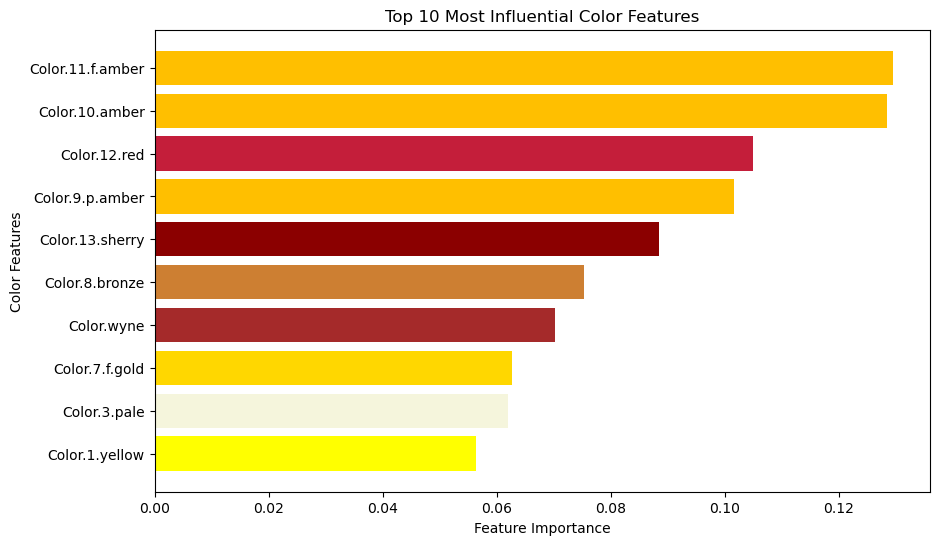

In [6]:
# Top 10 color features from color_df
top_10_colors_df = color_df.head(10)  # Top 10 color features
top_10_colors = top_10_colors_df['Feature'].apply(lambda x: x.split('.')[-1])  # Extract the color name

# Expanded color mapping to match the dataset
color_mapping = {
    'f.amber': '#FFBF00',  # Amber Gold
    'amber': '#FFBF00',  # Amber Gold
    'red': '#C41E3A',  # Whisky-like Red
    'p.amber': '#FFCC33',  # Pale Amber
    'sherry': '#8B0000',  # Deep Sherry-like
    'bronze': '#CD7F32',  # Bronze
    'wyne': '#A52A2A',  # Wine-like Brown
    'f.gold': '#FFD700',  # Gold
    'pale': '#F5F5DC',  # Pale Beige
    'yellow': '#FFFF00',  # Yellow
    'gold': '#FFD700'  # Added mapping for 'gold'
}

# Map colors using the expanded color mapping with a default color for any missing values
mapped_colors = [color_mapping.get(color, '#D3D3D3') for color in top_10_colors]  # Default to light gray if not found

# Plotting the bar chart with proper whisky-like colors
plt.figure(figsize=(10, 6))
plt.barh(top_10_colors_df['Feature'], top_10_colors_df['Importance'], color=mapped_colors)
plt.gca().invert_yaxis()  # Display the highest importance on top
plt.title("Top 10 Most Influential Color Features")
plt.xlabel("Feature Importance")
plt.ylabel("Color Features")
plt.show()


#### 2. Smell features:
Interpretation:
Dry and rich aromas are highly correlated with higher whisky scores, possibly indicating that dryness and richness in smell signal a well-aged or complex whisky.
Sea-like or coastal smells (Smell.8.SEA) contribute significantly, suggesting that coastal distilleries (e.g., Islay whiskies) benefit from this aroma.
Sweet and fruity smells play an important but secondary role, highlighting the balance between complexity and sweetness in whisky scoring.

In [7]:
# Modified the color pallete to have more whiskey-like colors
def plot_feature_importance(df, feature_group):
    # Repeat colors if necessary to match the number of bars
    colors = whiskey_colors * (len(df) // len(whiskey_colors) + 1)

    # lot the feature importance with whisky-like colors
    plt.figure(figsize=(10, 6))
    plt.barh(df['Feature'], df['Importance'], color=colors[:len(df)])  # Assign colors
    plt.gca().invert_yaxis()  # Display the highest importance on top
    plt.title(f"Most Influential {feature_group} Features")
    plt.xlabel("Feature Importance")
    plt.ylabel(f"{feature_group} Features")
    plt.show()

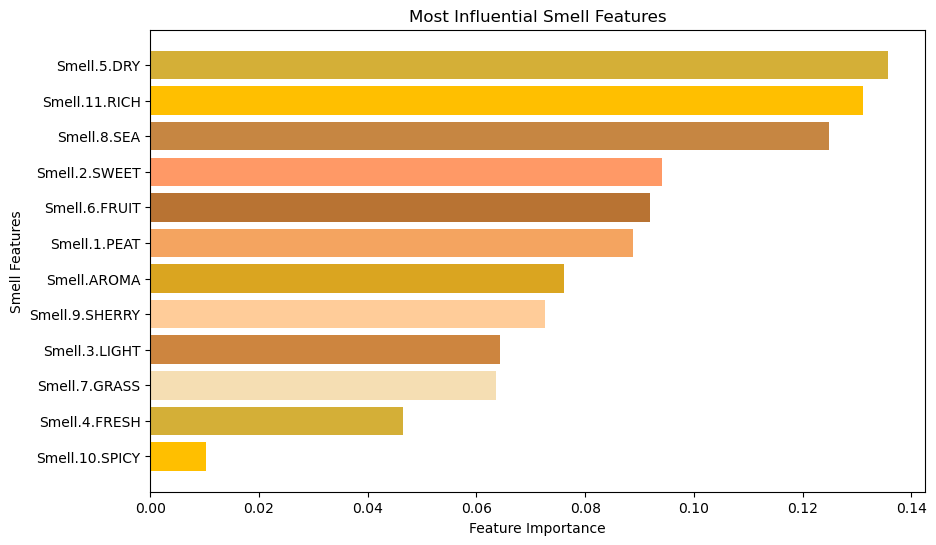

In [8]:
plot_feature_importance(smell_df, 'Smell')

####  3. Taste Features:
Interpretation:
Smoky flavors (Taste.9.smoke) have the highest influence, often associated with whiskies from regions like Islay.
Fruity and dry tastes contribute significantly, indicating that balance between sweetness and dryness is key to high scores.
Spicy and light tastes follow, suggesting that palates with layered spice or subtlety are valued.

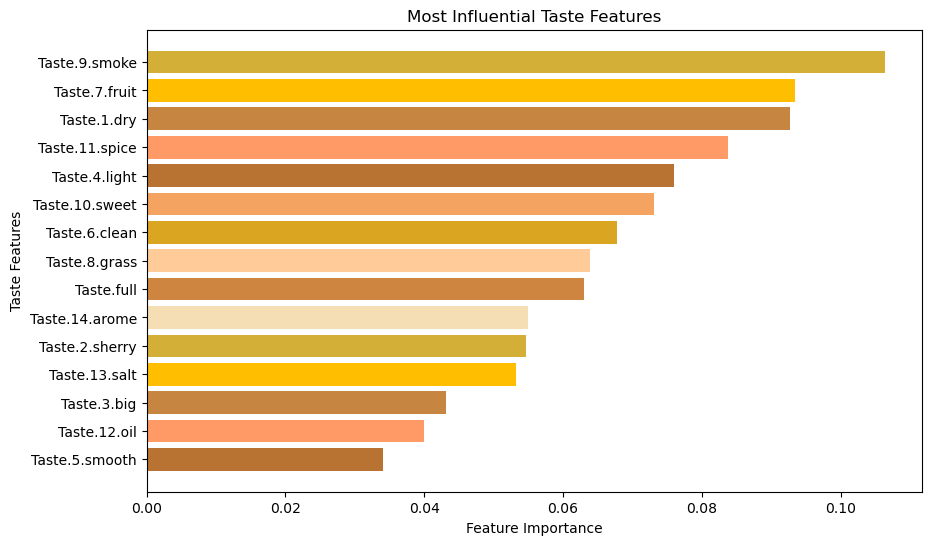

In [9]:
plot_feature_importance(taste_df, 'Taste')

#### 4. Aftertaste features:
Interpretation:
Dry aftertastes have the most significant influence, indicating that a crisp, clean finish enhances whisky scoring.
Saltiness (Aftertaste.13.salt) is another important factor, particularly in coastal and peated whiskies.
Big and long finishes (possibly indicating complexity and lingering effects) are valued, as are sweet aftertastes, highlighting the importance of balance in finish perception.

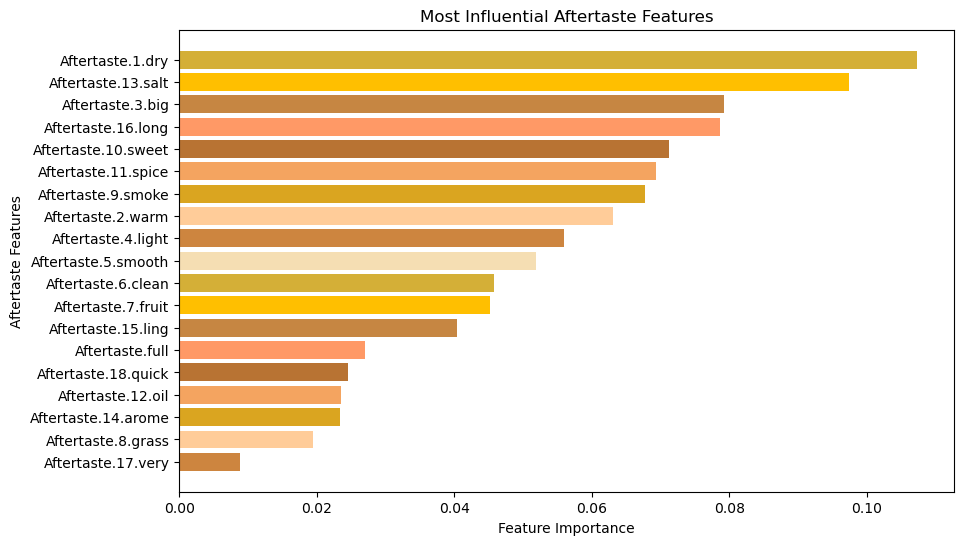

In [10]:
plot_feature_importance(aftertaste_df, 'Aftertaste')

#### Overall sensory Analysis
##### Focus Areas for Distilleries: 
To achieve higher scores, distilleries should focus on developing complex smells (rich, dry, or sea-like), amber or red color profiles, and aftertastes that are dry or salty. 
##### Consumer Preferences: 
Consumers looking for high-quality whiskies should seek those with complex aromas, bold flavors (smoke, salt), and rich colors. Spicy whiskey with short aftertaste seems to be the worst choice of whiskey
##### Opportunities for Differentiation: 
Features with low importance (like pale colors or smooth finishes) can be considered less critical, but they may still appeal to niche markets.

##### Most important sensory variables visualisation

Top 10 Sensory Features:
              Feature  Importance
0         Smell.5.DRY    0.135764
1       Smell.11.RICH    0.131133
2    Color.11.f.amber    0.129454
3      Color.10.amber    0.128443
4         Smell.8.SEA    0.124779
5    Aftertaste.1.dry    0.107327
6       Taste.9.smoke    0.106349
7        Color.12.red    0.105036
8     Color.9.p.amber    0.101564
9  Aftertaste.13.salt    0.097424

Bottom 10 Sensory Features:
                Feature  Importance
50       Taste.5.smooth    0.034040
51       Color.6.o.gold    0.031959
52      Aftertaste.full    0.026984
53  Aftertaste.18.quick    0.024609
54    Aftertaste.12.oil    0.023517
55  Aftertaste.14.arome    0.023405
56   Aftertaste.8.grass    0.019522
57       Smell.10.SPICY    0.010262
58   Aftertaste.17.very    0.008824
59       Color.2.v.pale    0.006242


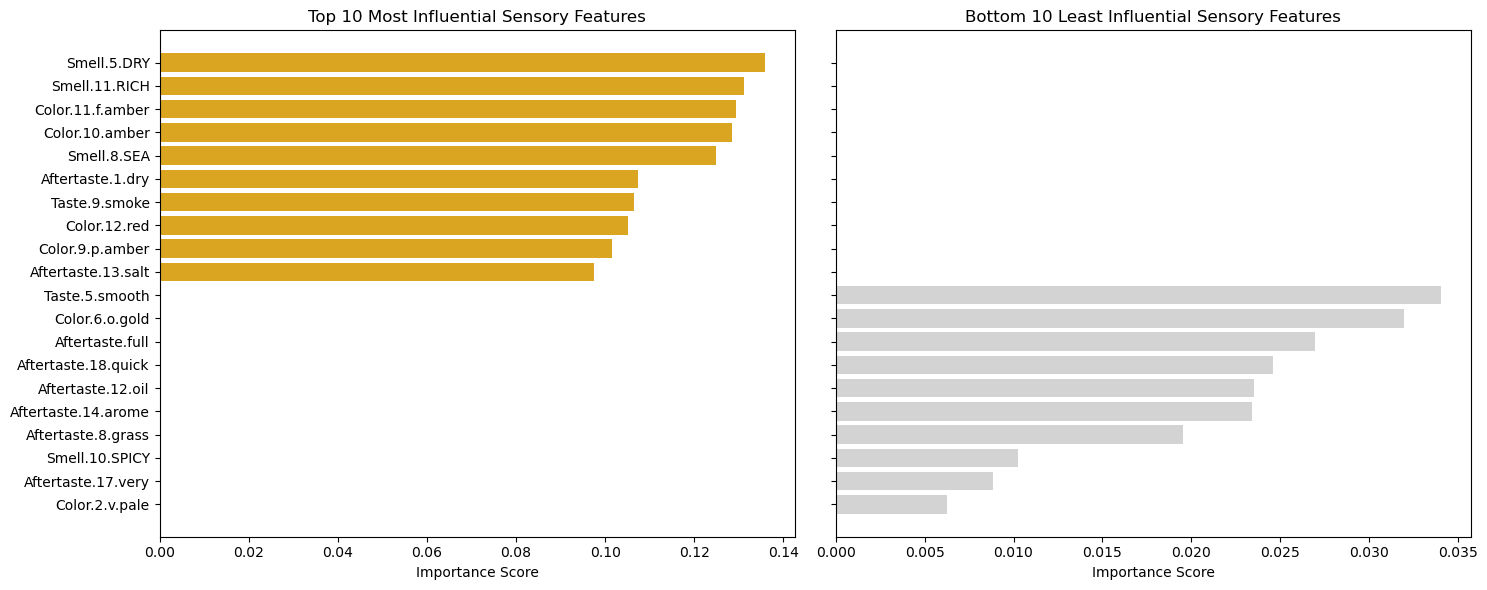

In [11]:
# Function to compute feature importances for a given group of variables
def feature_importance_by_group(group_prefix, target='Score'):
    # Filter columns based on group prefix (e.g., 'Color.', 'Smell.', 'Taste.', 'Aftertaste.')
    group_columns = [col for col in df.columns if col.startswith(group_prefix)]
    
    # Prepare X (features) and y (target)
    X = df[group_columns]
    y = df[target]
    
    # Train Random Forest to assess feature importance
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    
    # Get and sort feature importances
    importances = model.feature_importances_
    sorted_indices = np.argsort(importances)[::-1]  # Sort descending
    
    # Return sorted feature names with their importance scores
    return [(group_columns[i], importances[i]) for i in sorted_indices]

# Evaluate feature importance for different variable groups and combine them
all_importances = (
    feature_importance_by_group('Color.') +
    feature_importance_by_group('Smell.') +
    feature_importance_by_group('Taste.') +
    feature_importance_by_group('Aftertaste.')
)

# Create a DataFrame and sort by importance
all_importances_df = pd.DataFrame(all_importances, columns=['Feature', 'Importance'])
sorted_importances_df = all_importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame with sensory variables
print("Top 10 Sensory Features:")
print(sorted_importances_df.head(10))
print("\nBottom 10 Sensory Features:")
print(sorted_importances_df.tail(10))

# Visualization of top 10 and bottom 10 features
# Extract top 10 and bottom 10 features
top_10_features = sorted_importances_df.head(10)
bottom_10_features = sorted_importances_df.tail(10)

# Visualization setup
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot top 10 features
axes[0].barh(top_10_features['Feature'], top_10_features['Importance'], color='goldenrod')
axes[0].set_title('Top 10 Most Influential Sensory Features')
axes[0].invert_yaxis()  # Display the most important feature at the top
axes[0].set_xlabel('Importance Score')

# Plot bottom 10 features
axes[1].barh(bottom_10_features['Feature'], bottom_10_features['Importance'], color='lightgray')
axes[1].set_title('Bottom 10 Least Influential Sensory Features')
axes[1].set_xlabel('Importance Score')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### 3.2 Age influence
In this part I will explore a popular opinion that older whiskies suppose to have better qualities as well how age correlates with sensory variables

#### Age and whiskey score
In the visualization, we can observe that whiskey scores tend to increase up to around 14 years of age. Beyond this point, the scores generally decline. The Pearson correlation coefficient of -0.03 indicates a negligible linear relationship between whiskey age and score, suggesting that age alone is not a significant factor in determining the score.

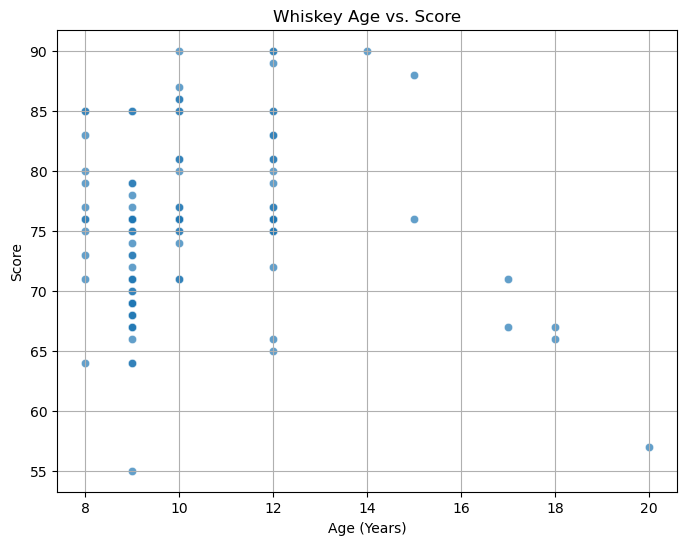

Correlation between Whiskey Age and Score: -0.0313


In [12]:
# Ensure the columns 'Age' and 'Score' exist in your dataframe
if 'Age' in df.columns and 'Score' in df.columns:
    # Scatter plot to visualize the relationship
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Age'], y=df['Score'], alpha=0.7, edgecolor='w')
    plt.title("Whiskey Age vs. Score")
    plt.xlabel("Age (Years)")
    plt.ylabel("Score")
    plt.grid(True)
    plt.show()

    # Compute and print correlation
    correlation = df['Age'].corr(df['Score'])
    print(f"Correlation between Whiskey Age and Score: {correlation:.4f}")

#### Age and whiskey taste
In the visualisation it's possible to see how taste correlates with Age. This might be interesting for customer for understanding the age of whiskey only by smell and taste 

C:\Users\gagar\AppData\Local\Temp\ipykernel_4380\3546204448.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_sensory_corr.index, y=age_sensory_corr.values, palette=whiskey_palette)


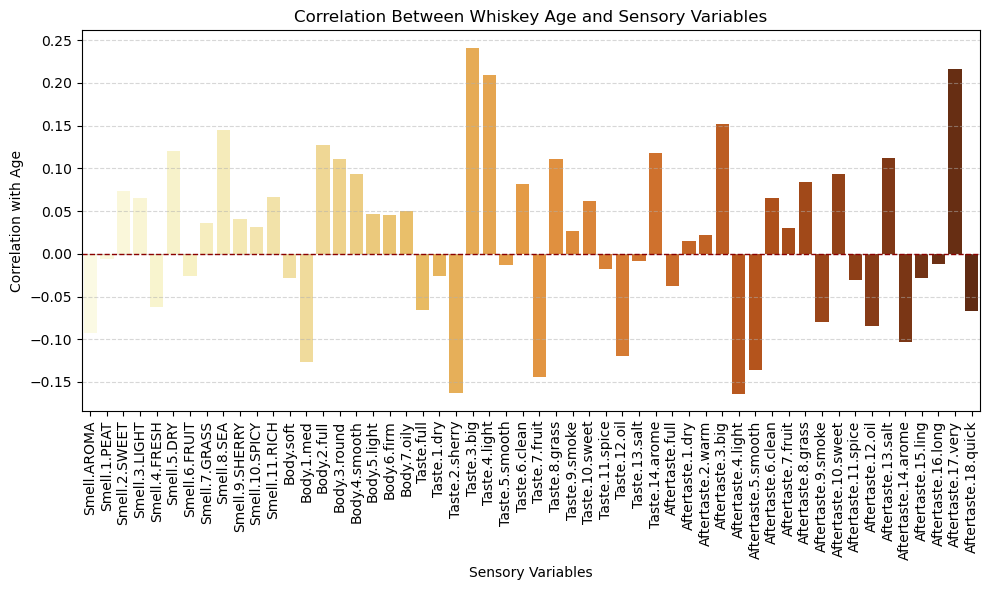

In [13]:
# Filter columns related to sensory characteristics (smell, taste, aftertaste, body)
sensory_columns = [col for col in df.columns if 'Smell' in col or 'Taste' in col or 'Aftertaste' in col or 'Body' in col]

# Calculate the correlation between age and sensory variables
age_sensory_corr = df[['Age'] + sensory_columns].corr()['Age'].drop('Age')

# Create the visualization with a whiskey-themed color palette
whiskey_palette = sns.color_palette("YlOrBr", len(age_sensory_corr))

plt.figure(figsize=(10, 6))
sns.barplot(x=age_sensory_corr.index, y=age_sensory_corr.values, palette=whiskey_palette)
plt.xticks(rotation=90)
plt.title("Correlation Between Whiskey Age and Sensory Variables")
plt.xlabel("Sensory Variables")
plt.ylabel("Correlation with Age")
plt.axhline(0, color='darkred', linestyle='--', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Age and whiskey color
Some color variables may show positive correlations with age, suggesting that older whiskeys tend to develop richer or darker colors. For example, darker hues like amber, bronze, or sherry-like colors may show a slight increase with aging due to prolonged cask interaction.

C:\Users\gagar\AppData\Local\Temp\ipykernel_4380\3656705110.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_color_corr.index, y=age_color_corr.values, palette=whiskey_palette)
C:\Users\gagar\AppData\Local\Temp\ipykernel_4380\3656705110.py:9: UserWarning: The palette list has more values (54) than needed (14), which may not be intended.
  sns.barplot(x=age_color_corr.index, y=age_color_corr.values, palette=whiskey_palette)


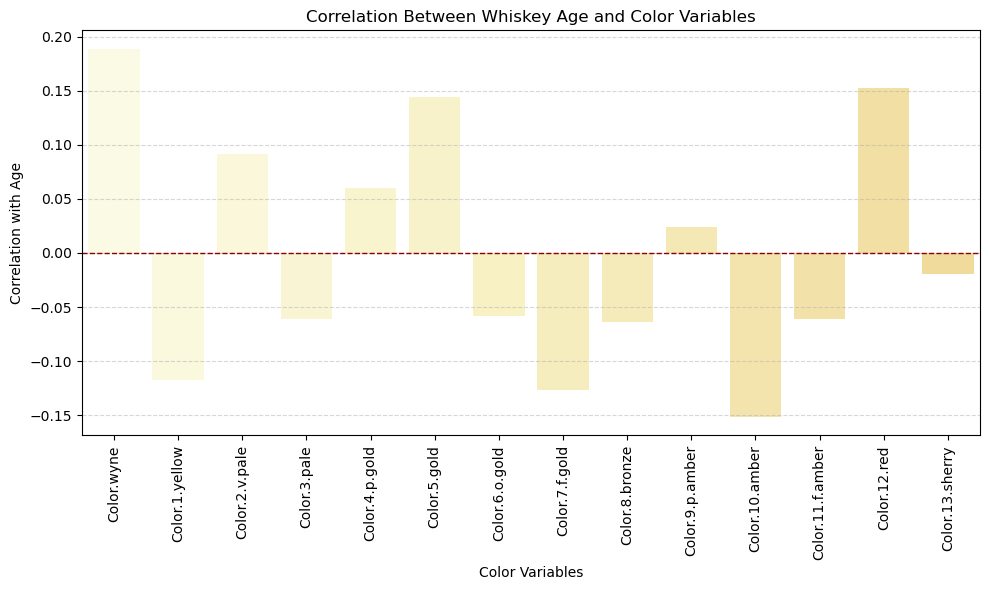

In [14]:
# Filter columns related to color characteristics
color_columns = [col for col in df.columns if 'Color' in col]

# Calculate the correlation between age and color variables
age_color_corr = df[['Age'] + color_columns].corr()['Age'].drop('Age')

# Create the visualization with a whiskey-themed color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=age_color_corr.index, y=age_color_corr.values, palette=whiskey_palette)
plt.xticks(rotation=90)
plt.title("Correlation Between Whiskey Age and Color Variables")
plt.xlabel("Color Variables")
plt.ylabel("Correlation with Age")
plt.axhline(0, color='darkred', linestyle='--', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3.3 Geographical influence
In this part I will look explore areas in Scotland and how scoring and qualities of whiskey differ from one place to another

#### Geogrpahy and whiskey score 
##### Areas with Higher Average Scores:

Certain regions may indicate regions known for producing high-quality or highly-rated whiskies.
#### Areas with Lower Scores:

Regions with lower average scores suggest that whiskies from these areas may generally be rated lower, potentially due to differences in production techniques, aging processes, or flavor profiles.

C:\Users\gagar\AppData\Local\Temp\ipykernel_4380\584486459.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Score', data=region_score_means_cleaned, palette=whiskey_palette)
C:\Users\gagar\AppData\Local\Temp\ipykernel_4380\584486459.py:11: UserWarning: The palette list has more values (54) than needed (3), which may not be intended.
  sns.barplot(x='Region', y='Score', data=region_score_means_cleaned, palette=whiskey_palette)


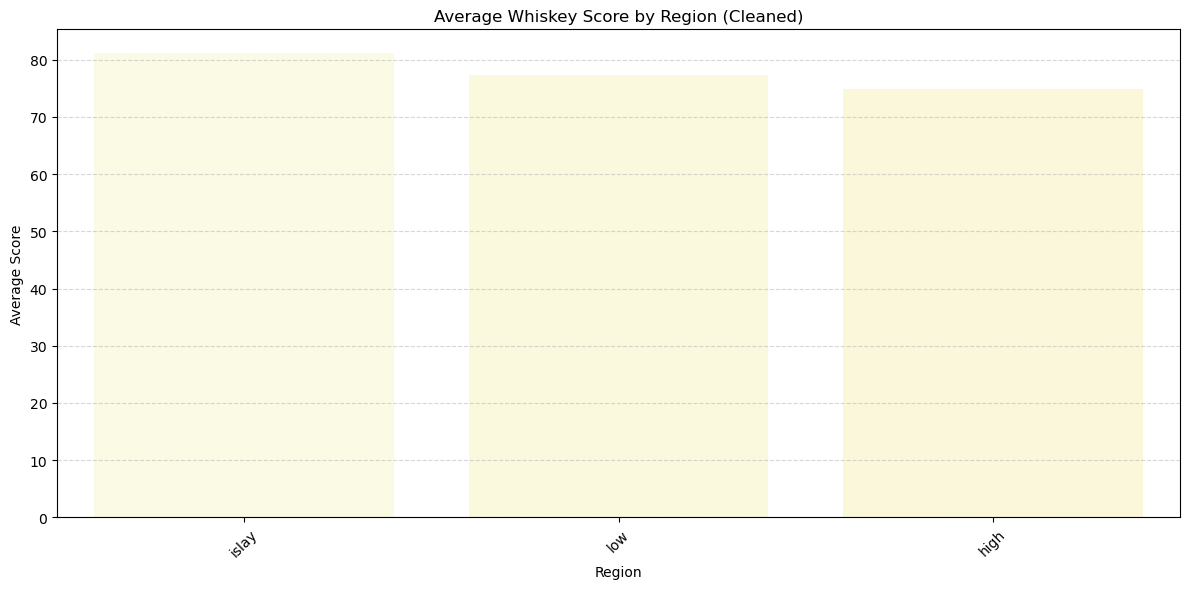

C:\Users\gagar\AppData\Local\Temp\ipykernel_4380\584486459.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='District', y='Score', data=district_score_means_cleaned, palette=whiskey_palette)
C:\Users\gagar\AppData\Local\Temp\ipykernel_4380\584486459.py:21: UserWarning: The palette list has more values (54) than needed (15), which may not be intended.
  sns.barplot(x='District', y='Score', data=district_score_means_cleaned, palette=whiskey_palette)


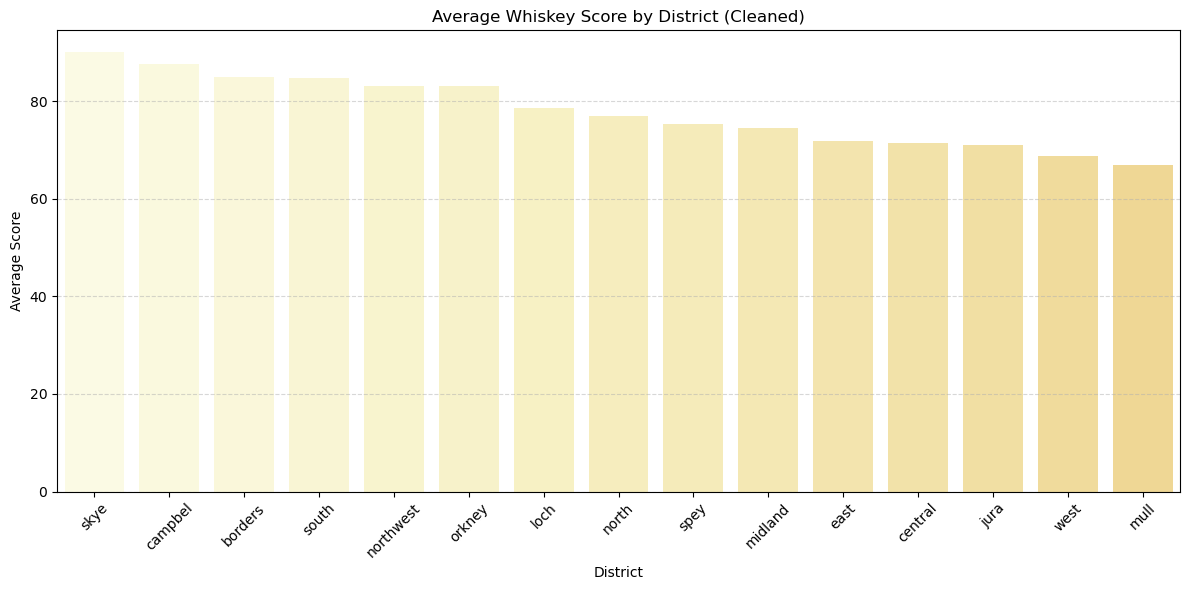

In [15]:
# Clean the 'Region' and 'District' columns by stripping whitespace and converting to lowercase
df['Region'] = df['Region'].str.strip().str.lower()
df['District'] = df['District'].str.strip().str.lower()

# Recalculate the means after cleaning
region_score_means_cleaned = df.groupby('Region')['Score'].mean().reset_index().sort_values(by='Score', ascending=False)
district_score_means_cleaned = df.groupby('District')['Score'].mean().reset_index().sort_values(by='Score', ascending=False)

# Re-plotting the cleaned visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Score', data=region_score_means_cleaned, palette=whiskey_palette)
plt.title("Average Whiskey Score by Region (Cleaned)")
plt.xlabel("Region")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Score', data=district_score_means_cleaned, palette=whiskey_palette)
plt.title("Average Whiskey Score by District (Cleaned)")
plt.xlabel("District")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Geography and whiskey taste

###### Darker shades indicate higher normalized intensity for that taste or smell characteristic within a given area.
It's possible to see that whiskeys from island showing strong taste and smell 
###### Lighter shades suggest lower intensity or minimal contribution of that characteristic.
At the same time islay whiskies are showing only strong dry aromas 
##### Certain areas may have distinct intensities for specific smells (e.g., fresh or fruity) but differ in taste, reflecting regional production and aging techniques.

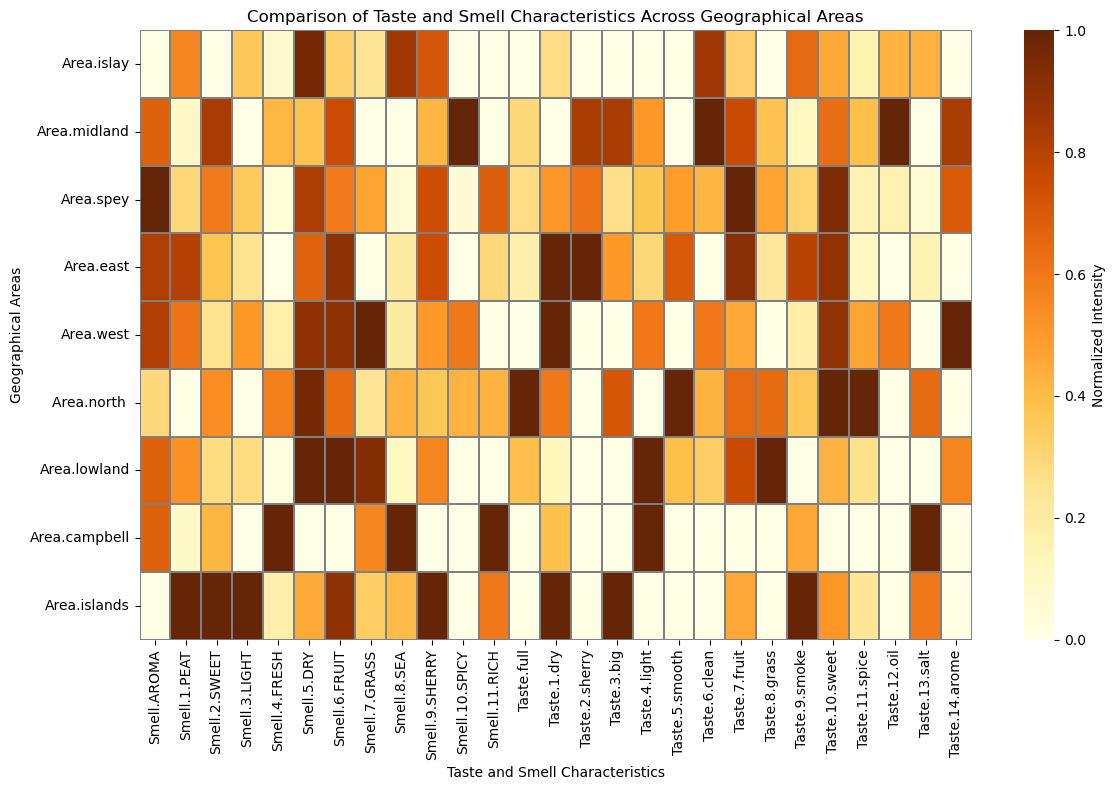

In [16]:
# Filter columns related to geographical variables and taste/smell
geo_columns = [col for col in df.columns if 'Area' in col]
taste_smell_columns = [col for col in df.columns if 'Taste' in col or 'Smell' in col]

# Recalculate the mean taste/smell scores for each area
area_taste_smell_means_fixed = {}

for area in geo_columns:
    area_taste_smell_means_fixed[area] = df.loc[df[area] == 1, taste_smell_columns].mean()

# Create the DataFrame
area_taste_smell_df = pd.DataFrame(area_taste_smell_means_fixed).T

# Convert to numeric and fill missing values (NaNs)
area_taste_smell_df = area_taste_smell_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Normalize the data for heatmap visualization
area_taste_smell_normalized = (area_taste_smell_df - area_taste_smell_df.min()) / (area_taste_smell_df.max() - area_taste_smell_df.min())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(area_taste_smell_normalized, cmap='YlOrBr', linewidths=0.1, linecolor='gray', annot=False, cbar_kws={'label': 'Normalized Intensity'})
plt.title("Comparison of Taste and Smell Characteristics Across Geographical Areas")
plt.xlabel("Taste and Smell Characteristics")
plt.ylabel("Geographical Areas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Part 4: Conclusions

#### Age is Not the Primary Determinant of Quality:
The analysis reveals that whiskey age beyond 14 years does not consistently lead to higher scores. Thus, age should not be considered the sole indicator of excellence.
#### Geographical Origin Influences Whiskey Scores:
Regions significantly affect whiskey quality due to their unique production styles:
With some areas as Lowlands tend to produce lighter, more floral whiskies, when islands are more reach in taste
#### Sensory Profiles Drive Perceived Quality:
The most highly-rated whiskies demonstrate a balanced combination of taste, aroma, and aftertaste. Characteristics such as sweetness, richness, smoothness, dark amber colors and lingering aftertastes are key indicators of quality.

#### Recommendations for Whiskey Enthusiasts:
##### For smoky and bold flavors:
Explore whiskies from Islay, known for their distinctive peaty and maritime characteristics.
##### For sweet and fruity profiles:
Focus on Speyside whiskies
##### For light and floral options:
Consider whiskies from the Lowlands, ideal for those seeking softer, more delicate flavors
##### Do not over-prioritize age:
Exceptional whiskies can be found at around 10-14 years of aging

### Recommendations for Distilleries:
#### Enhance Sensory Communication:
Clearly highlight key sensory characteristics such as longer aftertaste, dry taste and rich dark amber colors